In [1]:
# (c) Charles Le Losq 2021
# see embedded licence file

import numpy as np
import scipy
from scipy.optimize import curve_fit
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import uncertainties
from uncertainties import ufloat
from uncertainties.umath import *

# VFT fit of alumina viscosity data

A_TVF = -2.8 +/- 0.1, B_TVF = 1842 +/- 176, C_TVF = 1035 +/- 19
Ae_MYEGA = -2.3 +/- 0.1, m_MYEGA = 71 +/- 3, Tg_MYEGA = 1148 +/- 23


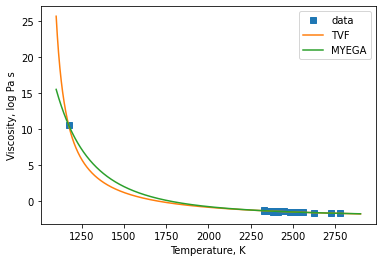

In [2]:
# grab the good viscosity data
al2o3_data = pd.read_excel("./data/Database_IPGP.xlsx", sheet_name="AL2O3_VISCOSITY")

# assignement of simple variables to handle
x = al2o3_data.loc[:,'T'].values
y = al2o3_data.loc[:,'viscosity'].values
# for simplicity we take a 2% error on HT measurements (Urbain et al. 1982), and 10% for the last single point at 1173 K
sigma = 0.02*y 
sigma[-1] = 0.1*y[-1] #1173 K point is the last...

# define the TVF equation and fit it to data
def tvf(x,A,B,C):
    return A + B/(x-C)

def MYEGA(x,Ae,m,Tg):
    return Ae + (12.0 - Ae)*(Tg/x)*np.exp((m/(12.0-Ae)-1.0)*(Tg/x-1.0))

popt, pcov = curve_fit(tvf, x, y, p0 = (-2., 1800, 1000), sigma = sigma)
perr = np.sqrt(np.diag(pcov))

popt_MYEGA, pcov_MYEGA = curve_fit(MYEGA, x, y, p0 = (-2.8, 40, 1165), sigma = sigma)
perr_MYEGA = np.sqrt(np.diag(pcov_MYEGA))

# make a plot
plt.plot(x,y,'s',label='data')
T_int = np.arange(1100, 2900, 1.0)
plt.plot(T_int, tvf(T_int, *popt),label='TVF')
plt.plot(T_int, MYEGA(T_int, *popt_MYEGA),label='MYEGA')
plt.xlabel('Temperature, K')
plt.ylabel('Viscosity, log Pa s')
plt.legend(loc='best')

print('A_TVF = {:.1f} +/- {:.1f}, B_TVF = {:.0f} +/- {:.0f}, C_TVF = {:.0f} +/- {:.0f}'.format(popt[0], perr[0],
                                                                       popt[1], perr[1],
                                                                       popt[2], perr[2]
                                                                        ))

print('Ae_MYEGA = {:.1f} +/- {:.1f}, m_MYEGA = {:.0f} +/- {:.0f}, Tg_MYEGA = {:.0f} +/- {:.0f}'.format(popt_MYEGA[0], perr_MYEGA[0],
                                                                       popt_MYEGA[1], perr_MYEGA[1],
                                                                       popt_MYEGA[2], perr_MYEGA[2]
                                                                        ))

# Tg determination

In [3]:
A_TVF = ufloat(popt[0], perr[0])
B_TVF = ufloat(popt[1], perr[1])
C_TVF = ufloat(popt[2], perr[2])

print("Calculated Tg (with error propagation) is: {} K".format((B_TVF/(12.0-A_TVF))+C_TVF))

Calculated Tg (with error propagation) is: 1160+/-23 K


In [4]:
tvf(1160
    ,*popt)

11.990598391891416